In [1]:
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
d = os.path.dirname(os.getcwd())
sys.path.insert(0, d)

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

from torchvision.datasets import MNIST
from torchvision import transforms


from utils.train_utils import ModelTrainer, plot_history
from models.mnist_model import *
from utils.attacks import pgd

In [3]:
tr_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
vl_transform = transforms.Compose([
    transforms.ToTensor()
])

ds_train = MNIST('../data', train=True, download=True, transform=tr_transform)
ds_test = MNIST('../data', train=False, download=True, transform=vl_transform)

cuda
Epoch: 1 Validation Loss: 0.5761 accuracy: 0.8165, time: 0:00:20                
Epoch: 2 Validation Loss: 0.4579 accuracy: 0.8595, time: 0:00:19                
Epoch: 3 Validation Loss: 0.4063 accuracy: 0.8715, time: 0:00:19                
Epoch: 4 Validation Loss: 0.3742 accuracy: 0.8843, time: 0:00:19                
Epoch: 5 Validation Loss: 0.3371 accuracy: 0.8960, time: 0:00:19                
Epoch: 6 Validation Loss: 0.3091 accuracy: 0.9063, time: 0:00:19                
Epoch: 7 Validation Loss: 0.2829 accuracy: 0.9140, time: 0:00:19                
Epoch: 8 Validation Loss: 0.2587 accuracy: 0.9207, time: 0:00:18                
Epoch: 9 Validation Loss: 0.2350 accuracy: 0.9290, time: 0:00:19                
Epoch: 10 Validation Loss: 0.2210 accuracy: 0.9331, time: 0:00:19               
Epoch: 11 Validation Loss: 0.2093 accuracy: 0.9357, time: 0:00:18               
Epoch: 12 Validation Loss: 0.1977 accuracy: 0.9404, time: 0:00:19               
Epoch: 13 Validation Lo

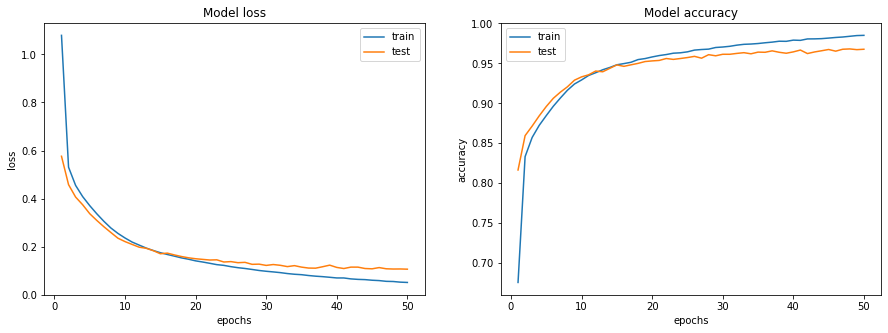

In [6]:
trainer = ModelTrainer(ds_train, ds_test, is_sparse=False, batch_size=100)

model = MnistBaseModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=3e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-7, patience=3, verbose=True)

history = trainer.train(model, loss_fn, optimizer, scheduler, epochs=50, patience=8)
plot_history(history)
torch.save(model.state_dict(), "../saved/mnist_base_model.pt")

torch.cuda.empty_cache()

cuda
Epoch: 1 Validation Loss: 0.9625 accuracy: 0.6903, time: 0:01:34                
Epoch: 2 Validation Loss: 0.8527 accuracy: 0.7099, time: 0:01:32                
Epoch: 3 Validation Loss: 0.7990 accuracy: 0.7237, time: 0:01:36                
Epoch: 4 Validation Loss: 0.7537 accuracy: 0.7358, time: 0:01:37                
Epoch: 5 Validation Loss: 0.7164 accuracy: 0.7462, time: 0:01:36                
Epoch: 6 Validation Loss: 0.6887 accuracy: 0.7522, time: 0:01:35                
Epoch: 7 Validation Loss: 0.6674 accuracy: 0.7572, time: 0:01:32                
Epoch: 8 Validation Loss: 0.6562 accuracy: 0.7582, time: 0:01:36                
Epoch: 9 Validation Loss: 0.6425 accuracy: 0.7601, time: 0:01:36                
Epoch: 10 Validation Loss: 0.6307 accuracy: 0.7628, time: 0:01:36               
Epoch: 11 Validation Loss: 0.6231 accuracy: 0.7658, time: 0:01:36               
Epoch: 12 Validation Loss: 0.6186 accuracy: 0.7666, time: 0:01:36               
Epoch: 13 Validation Lo

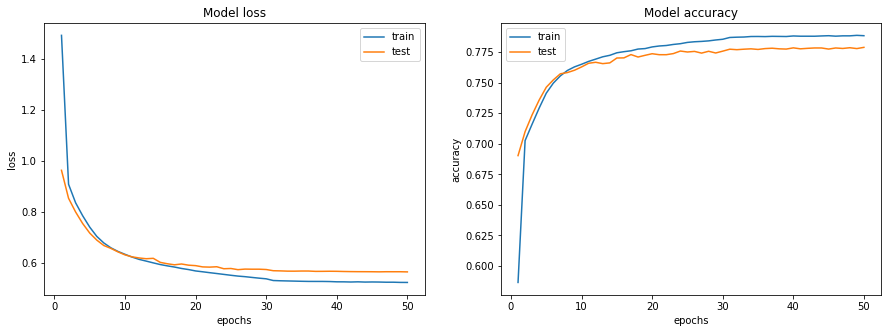

In [6]:
trainer = ModelTrainer(ds_train, ds_test, is_sparse=False, batch_size=100)

model = MnistDTLModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=3e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-7, patience=3, verbose=True)

history = trainer.train(model, loss_fn, optimizer, scheduler, epochs=50, patience=8)
plot_history(history)
torch.save(model.state_dict(), "../saved/mnist_dtl_model.pt")

torch.cuda.empty_cache()

cuda
Epoch: 1 Validation Loss: 0.2569 accuracy: 0.9174, time: 0:00:20                
Epoch: 2 Validation Loss: 0.1251 accuracy: 0.9593, time: 0:00:20                
Epoch: 3 Validation Loss: 0.0922 accuracy: 0.9696, time: 0:00:19                
Epoch: 4 Validation Loss: 0.0935 accuracy: 0.9692, time: 0:00:19                
epochs_no_improve: 1/8
Epoch: 5 Validation Loss: 0.0755 accuracy: 0.9755, time: 0:00:20                
Epoch: 6 Validation Loss: 0.0714 accuracy: 0.9768, time: 0:00:25                
Epoch: 7 Validation Loss: 0.0646 accuracy: 0.9782, time: 0:00:25                
Epoch: 8 Validation Loss: 0.0682 accuracy: 0.9775, time: 0:00:25                
epochs_no_improve: 1/8
Epoch: 9 Validation Loss: 0.0578 accuracy: 0.9806, time: 0:00:25                
Epoch: 10 Validation Loss: 0.0688 accuracy: 0.9784, time: 0:00:25               
epochs_no_improve: 1/8
Epoch: 11 Validation Loss: 0.0651 accuracy: 0.9784, time: 0:00:25               
epochs_no_improve: 2/8
Epoch: 12 Va

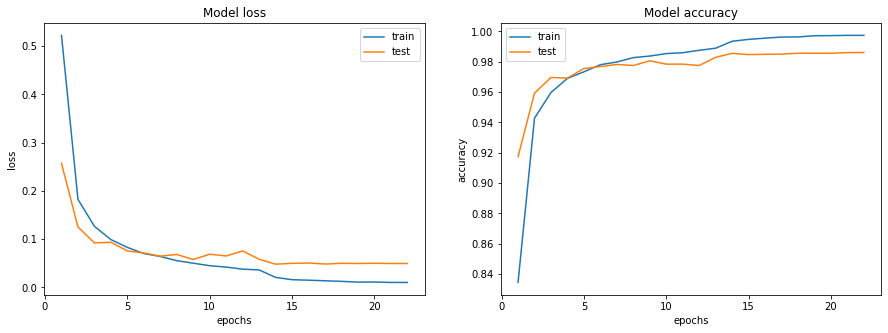

In [8]:
trainer = ModelTrainer(ds_train, ds_test, is_sparse=False, batch_size=100)

model = MnistBaseConvModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=3e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-7, patience=3, verbose=True)

history = trainer.train(model, loss_fn, optimizer, scheduler, epochs=50, patience=8)
plot_history(history)
torch.save(model.state_dict(), "../saved/mnist_base_conv_model.pt")

torch.cuda.empty_cache()

cuda
Epoch: 1 Validation Loss: 0.6155 accuracy: 0.8505, time: 0:01:04                
Epoch: 2 Validation Loss: 0.5983 accuracy: 0.8519, time: 0:01:01                
Epoch: 3 Validation Loss: 0.5598 accuracy: 0.8707, time: 0:01:05                
Epoch: 4 Validation Loss: 0.5254 accuracy: 0.8797, time: 0:01:08                
Epoch: 5 Validation Loss: 0.5314 accuracy: 0.8776, time: 0:01:09                
epochs_no_improve: 1/8
Epoch: 6 Validation Loss: 0.5167 accuracy: 0.8829, time: 0:01:09                
Epoch: 7 Validation Loss: 0.5134 accuracy: 0.8846, time: 0:01:10                
Epoch: 8 Validation Loss: 0.5103 accuracy: 0.8855, time: 0:01:08                
Epoch: 9 Validation Loss: 0.4996 accuracy: 0.8883, time: 0:01:10                
Epoch: 10 Validation Loss: 0.5163 accuracy: 0.8836, time: 0:01:05               
epochs_no_improve: 1/8
Epoch: 11 Validation Loss: 0.5074 accuracy: 0.8859, time: 0:01:08               
epochs_no_improve: 2/8
Epoch: 12 Validation Loss: 0.5073 a

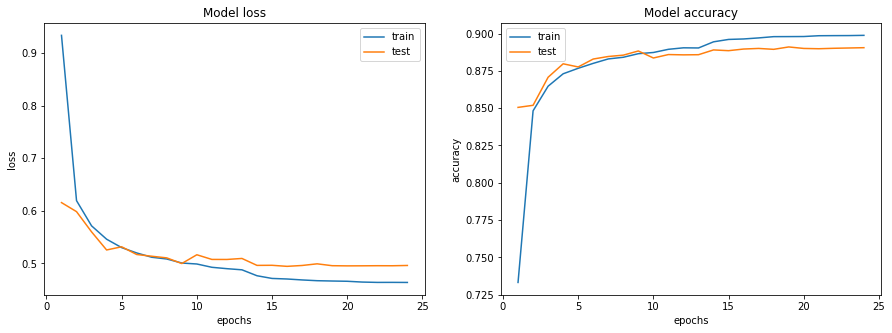

In [12]:
trainer = ModelTrainer(ds_train, ds_test, is_sparse=False, batch_size=100)

model = MnistDTLConvModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=3e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-7, patience=3, verbose=True)

history = trainer.train(model, loss_fn, optimizer, scheduler, epochs=50, patience=8)
plot_history(history)
torch.save(model.state_dict(), "../saved/mnist_dtl_conv_model.pt")

torch.cuda.empty_cache()

## Adversarial Training

In [13]:
attack_params = {
    "epsilon": 0.3,
    "alpha": 0.01,
    "num_iter": 30
}

cuda
Epoch: 1 Validation Loss: 1.3615 accuracy: 0.7009, time: 0:01:04                
Epoch: 2 Validation Loss: 0.5792 accuracy: 0.8628, time: 0:01:02                
Epoch: 3 Validation Loss: 0.3234 accuracy: 0.9362, time: 0:01:03                
Epoch: 4 Validation Loss: 0.1654 accuracy: 0.9563, time: 0:01:03                
Epoch: 5 Validation Loss: 0.1388 accuracy: 0.9613, time: 0:01:02                
Epoch: 6 Validation Loss: 0.1276 accuracy: 0.9646, time: 0:01:03                
Epoch: 7 Validation Loss: 0.1148 accuracy: 0.9674, time: 0:01:03                
Epoch: 8 Validation Loss: 0.1175 accuracy: 0.9625, time: 0:01:04                
epochs_no_improve: 1/8
Epoch: 9 Validation Loss: 0.1010 accuracy: 0.9700, time: 0:01:04                
Epoch: 10 Validation Loss: 0.1037 accuracy: 0.9690, time: 0:01:02               
epochs_no_improve: 1/8
Epoch: 11 Validation Loss: 0.0963 accuracy: 0.9715, time: 0:01:03               
Epoch: 12 Validation Loss: 0.1018 accuracy: 0.9703, time: 

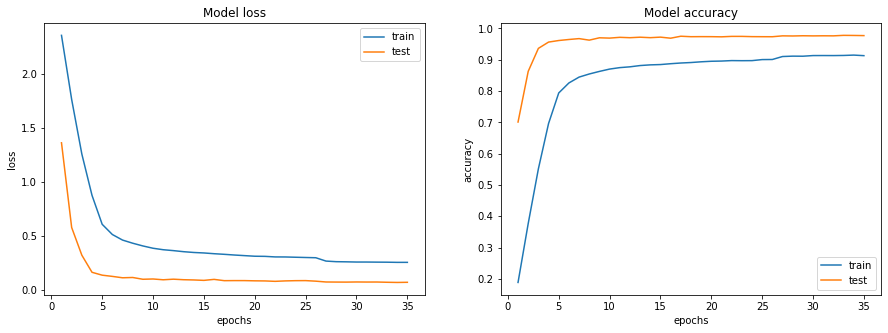

In [14]:
trainer = ModelTrainer(ds_train, ds_test, is_sparse=False, batch_size=100)
model = MnistBaseConvModel()
model.load_state_dict(torch.load("../saved/mnist_base_conv_model.pt", map_location=trainer.device))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=3e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-6, patience=3, verbose=True)

history = trainer.adv_train(model, pgd, attack_params, loss_fn, optimizer, scheduler, epochs=35, patience=8)
plot_history(history)
torch.save(model.state_dict(), "../saved/mnist_base_conv_model_AT.pt")

torch.cuda.empty_cache()

cuda
Epoch: 1 Validation Loss: 2.1498 accuracy: 0.4553, time: 0:22:52                
Epoch: 2 Validation Loss: 2.0868 accuracy: 0.5797, time: 0:23:00                
Epoch: 3 Validation Loss: 0.8655 accuracy: 0.7952, time: 0:22:47                
Epoch: 4 Validation Loss: 0.6709 accuracy: 0.8207, time: 0:13:47                
Epoch: 5 Validation Loss: 0.6478 accuracy: 0.8481, time: 0:22:36                
Epoch: 6 Validation Loss: 0.6197 accuracy: 0.8574, time: 0:26:22                
Epoch: 7 Validation Loss: 0.6002 accuracy: 0.8606, time: 0:19:07                
Epoch: 8 Validation Loss: 0.5992 accuracy: 0.8553, time: 0:05:47                
Epoch: 9 Validation Loss: 0.5813 accuracy: 0.8624, time: 0:05:57                
Epoch: 10 Validation Loss: 0.5780 accuracy: 0.8658, time: 0:05:58               
Epoch: 11 Validation Loss: 0.5605 accuracy: 0.8690, time: 0:06:35               
Epoch: 12 Validation Loss: 0.5573 accuracy: 0.8678, time: 0:29:02               
Epoch: 13 Validation Lo

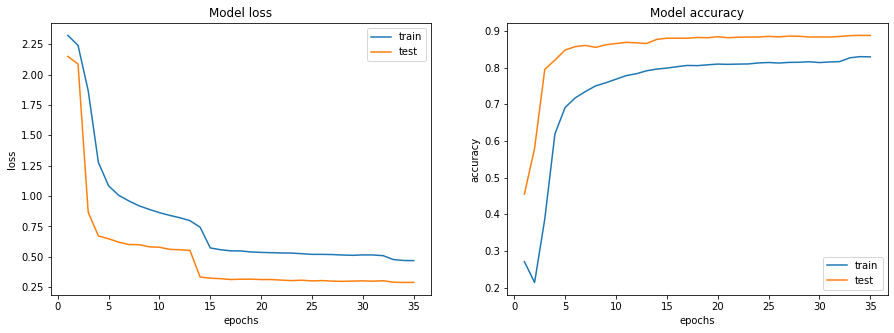

In [6]:
trainer = ModelTrainer(ds_train, ds_test, is_sparse=False, batch_size=100)
model = MnistDTLConvModel()
model.load_state_dict(torch.load("../saved/mnist_dtl_conv_model.pt", map_location=trainer.device))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=3e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-6, patience=3, verbose=True)

history = trainer.adv_train(model, pgd, attack_params, loss_fn, optimizer, scheduler, epochs=35, patience=8)
plot_history(history)
torch.save(model.state_dict(), "../saved/mnist_dtl_conv_model_AT.pt")

torch.cuda.empty_cache()